In [12]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT.EnableImplicitMT()

In [3]:
@ROOT.Numba.Declare(['float', 'float', 'float'], 'bool')
def kk_bin(kk_cand, kk_low, kk_high):
    return kk_low < kk_cand < kk_high

In [4]:
channel = 'pipkmks'
run_period = '2017'
if channel == 'pipkmks':
    thrown_kaon = "KMinus"
    kkm = 'kmks_m'
else:
    thrown_kaon = "KPlus"
    kkm = 'kpks_m'

In [5]:
df_signal = tools.get_dataframe(channel, run_period, 'signal')
df_thrown = tools.get_dataframe(channel, run_period, 'signal', thrown=True, filtered=False)
df_thrown = df_thrown.Define('kk_px', f'{thrown_kaon}_px + Ks_px')
df_thrown = df_thrown.Define('kk_py', f'{thrown_kaon}_py + Ks_py')
df_thrown = df_thrown.Define('kk_pz', f'{thrown_kaon}_pz + Ks_pz')
df_thrown = df_thrown.Define('kk_e', f'{thrown_kaon}_E + Ks_E')
df_thrown = df_thrown.Define('kk_m', 'sqrt(kk_e * kk_e - kk_px*kk_px - kk_py*kk_py- kk_pz*kk_pz)')

In [6]:
print(df_signal.GetColumnNames())
print(df_thrown.GetColumnNames())

{ "chi2ndf", "p_p", "pip1_p", "pip2_p", "pim_p", "km_p", "p_theta", "pip1_theta", "pip2_theta", "pim_theta", "km_theta", "p_phi", "pip1_phi", "pip2_phi", "pim_phi", "km_phi", "p_pt", "ks_px", "ks_py", "ks_pz", "ks_E", "ks_p", "ks_theta", "ks_phi", "ks_m", "ks_px_measured", "ks_py_measured", "ks_pz_measured", "ks_E_measured", "ks_m_measured", "mxpx_ppipkmks", "mxpy_ppipkmks", "mxpz_ppipkmks", "mxe_ppipkmks", "mx2_ppipkmks", "ppip_px", "ppip_py", "ppip_pz", "ppip_E", "ppip_m", "missing_px", "missing_py", "missing_pz", "missing_E", "missing_m", "kmp_px", "kmp_py", "kmp_pz", "kmp_E", "kmp_m", "ksp_px", "ksp_py", "ksp_pz", "ksp_E", "ksp_m", "kspip_px", "kspip_py", "kspip_pz", "kspip_E", "kspip_m", "kmpip_px", "kmpip_py", "kmpip_pz", "kmpip_E", "kmpip_m", "pipkmks_px", "pipkmks_py", "pipkmks_pz", "pipkmks_E", "pipkmks_px_measured", "pipkmks_py_measured", "pipkmks_pz_measured", "pipkmks_pt", "pipkmks_p_pt_diff", "pipkmks_m", "kmks_px", "kmks_py", "kmks_pz", "kmks_E", "kmks_m", "e_bin", "t_bin

In [7]:
bin_width = 0.005 # GeV
kk_low, kk_high = 0.5, 1.0
n_bins = int((kk_high - kk_low) / bin_width)

m_middles = []
effs = []
n_recon = []
n_thrown = []



In [8]:
cut = '{}_kk_m > {} && {}_kk_m < {}'
for i in range(n_bins):
    m_low = i * bin_width
    m_high = (i + 1) * bin_width
    m_middle = i * bin_width + bin_width / 2
    # print(p_middle)
    n_recon.append(df_signal.Filter(f'Numba::kk_bin({kkm}, {m_low}, {m_high})').Count())
    n_thrown.append(df_thrown.Filter(f'Numba::kk_bin(kk_m, {m_low}, {m_high})').Count())

    m_middles.append(m_middle)
    # effs.append(acceptance)


0.025
0.07500000000000001
0.125
0.17500000000000002
0.225
0.275
0.32500000000000007
0.37500000000000006
0.42500000000000004
0.47500000000000003
0.525
0.5750000000000001
0.6250000000000001
0.675
0.7250000000000001
0.775
0.8250000000000001
0.8750000000000001
0.925
0.9750000000000001
1.025
1.075
1.125
1.175
1.225
1.275
1.325
1.375
1.425
1.475
1.525
1.575
1.625
1.675
1.725
1.775
1.825
1.875
1.925
1.975
2.025
2.075
2.125
2.175
2.225
2.275
2.325
2.375
2.4250000000000003
2.475
2.525
2.575
2.625
2.6750000000000003
2.725
2.775
2.825
2.875
2.9250000000000003
2.975
3.025
3.075
3.125
3.1750000000000003
3.225
3.275
3.325
3.375
3.4250000000000003
3.475


In [9]:
df_signal.Count().GetValue()
df_thrown.Count().GetValue()

77902610

In [27]:
effs = [n_recon[i].GetValue() / n_thrown[i].GetValue() for i in range(n_bins)]
errors = [effs[i] * np.sqrt(n_recon[i].GetValue())/n_recon[i].GetValue() if n_recon[i].GetValue() > 0 else 0 for i in range(n_bins)]

In [11]:
df_acc = pd.DataFrame({'m_middle': np.array(m_middles), 'eff': np.array(effs)})
df_acc.to_csv(f'acceptance_{channel}_{run_period}.csv', index=False)

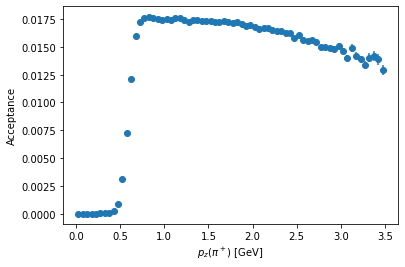

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel('$M(KK)$ [GeV]')
ax.set_ylabel('Acceptance')
# ax.plot(p_middles, effs)
ax.errorbar(m_middles, effs, yerr=np.array(errors), fmt='o')
plt.show()